# Capstone Project

### About Company

##### Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. 

##### Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.

### Goal

##### Tasked with analyzing the data to come up with ideas for how to increase employee retention. To help with this, it is optimal to design a model that predicts whether an employee will leave the company based on their  department, number of projects, average monthly hours, and any other data points you deem helpful.

### Data source

##### A sample from Salifort Motors

### Objectives

1. Showcase the likely factors that cause turnovers
2. Prediction of employees that will turnover
3. How to increase employee retentionship and job satisfaction.

### Milestone 1

####  Clean, prepare and conduct EDA on the data.  Steps;

##### 1. Handling missing values and duplicates.
##### 2. Determining if the duplicates should be kept or not.
##### 3. Detect outliers using box plots.
##### 4. Give visible insights.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

pd.set_option('display.max_columns', None)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

#metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
capstone = pd.read_csv(r'C:\Users\HP\Downloads\Data analytics\Capstone\HR_capstone_dataset.csv')
capstone

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
capstone.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
capstone = capstone.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})
capstone[capstone.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
#Let's run a likelihood analysis to see if the duplicated values don't add predictive power to the models

duplicated_rows = capstone[capstone.duplicated(keep=False)]

left_1 = duplicated_rows[duplicated_rows['left'] == 1]
left_0 = duplicated_rows[duplicated_rows['left'] == 0]

# Prior probabilities
P_left_1 = len(left_1) / len(duplicated_rows)
P_left_0 = len(left_0) / len(duplicated_rows)

# Precompute conditional probabilities for each feature value given 'left'
conditional_probs = {}

for col in duplicated_rows.columns:
    if col != 'left':
        probs = {}
        for value in duplicated_rows[col].unique():
            P_value_given_left_1 = len(left_1[left_1[col] == value]) / len(left_1) if len(left_1) > 0 else 0.0001
            P_value_given_left_0 = len(left_0[left_0[col] == value]) / len(left_0) if len(left_0) > 0 else 0.0001
            probs[value] = (P_value_given_left_1 if P_value_given_left_1 > 0 else 0.0001,
                            P_value_given_left_0 if P_value_given_left_0 > 0 else 0.0001)
        conditional_probs[col] = probs

# Vectorized likelihood calculation
likelihood_left_1 = np.full(len(duplicated_rows), P_left_1)
likelihood_left_0 = np.full(len(duplicated_rows), P_left_0)

for col in duplicated_rows.columns:
    if col != 'left':
        values = duplicated_rows[col].values
        prob_left_1 = np.array([conditional_probs[col].get(v, (0.0001, 0.0001))[0] for v in values])
        prob_left_0 = np.array([conditional_probs[col].get(v, (0.0001, 0.0001))[1] for v in values])
        
        likelihood_left_1 *= prob_left_1
        likelihood_left_0 *= prob_left_0

# Combine likelihoods into a DataFrame
likelihoods = pd.DataFrame({
    'Likelihood_left_1': likelihood_left_1,
    'Likelihood_left_0': likelihood_left_0
})


# Add a likelihood ratio to understand the strength of prediction (how much more likely an employee is to leave
# compared to stay)
likelihoods['Likelihood_Ratio'] = likelihoods['Likelihood_left_1'] / (likelihoods['Likelihood_left_0'] + 1e-9)

likelihoods['Decision'] = np.where(abs(likelihoods['Likelihood_left_1'] - likelihoods['Likelihood_left_0']) < 0.1 *
                                  likelihoods[['Likelihood_left_1', 'Likelihood_left_0']].max(axis = 1),
                                  'Remove','Keep')

likelihoods.head()

,Likelihood_left_1,Likelihood_left_0,Likelihood_Ratio,Decision
0,2.698000e-07,5.038915e-10,179.401213,Keep
1,5.416556e-10,9.184215e-10,0.282344,Keep
2,1.347158e-09,7.181603e-15,1.347149,Keep
3,6.043210e-09,6.062495e-10,3.762311,Keep
4,4.937242e-07,1.145208e-09,230.152119,Keep


In [6]:
decision_counts = likelihoods['Decision'].value_counts(normalize = True) * 100

# Classify based on likelihood ratio
likelihoods['Predicted_Class'] = np.where(likelihoods['Likelihood_Ratio'] > 1, 'Leave', 'Stay')

# Calculate the proportions
proportion_summary = likelihoods['Predicted_Class'].value_counts(normalize=True) * 100


print(f'{decision_counts} \t {proportion_summary}')

Keep      99.513655
Remove     0.486345
Name: Decision, dtype: float64 	 Stay     61.485223
Leave    38.514777
Name: Predicted_Class, dtype: float64


The result of the likelihood analysis (Bayes' theorem) on the duplicated records says that 99.5% of it should be kept due to the significant predictive value they all to predicting one of the two likely events of the dependent variable.

It is also seen that the likelihood of the employees staying is significantly more than the likelihood of employees leaving; 61.49% to 38.51% to be exact.

So the duplicated segment of the original dataset is not just noise but quite useful but approximately 62% of the dataset lean towards the probability of the employees staying rather than leaving.

My instinct tells me to downsample it, to reduce the bais while retaining its predictive power.

In [7]:
#Downsampling the duplicated rows

stay_dupes = duplicated_rows[duplicated_rows['left'] == 0]
leave_dupes = duplicated_rows[duplicated_rows['left'] == 1]

min_size = min(len(stay_dupes), len(leave_dupes))
stay_downsampled = resample(stay_dupes, replace = False, n_samples = min_size, random_state = 10)
leave_downsampled = resample(leave_dupes, replace = False, n_samples = min_size, random_state = 10)

#Restructing the dataset by removing all the duplicates, then adding the important rows back into the original dataset
capstone_1 = capstone.drop_duplicates(keep = False)
capstone_1 = pd.concat([capstone_1, stay_downsampled, leave_downsampled])

In [8]:
print('This is proportion of employees daparture in the original dataset: ',
      capstone['left'].value_counts(normalize = True) * 100)
print('This is proportion of employees daparture in the original dataset without duplicates: ',
      capstone.drop_duplicates(keep = 'first')['left'].value_counts(normalize = True) * 100)
print('This is proportion of employees daparture in the original dataset after analysing the duplicates and downsampling: ',
      capstone_1['left'].value_counts(normalize = True) * 100)

This is proportion of employees daparture in the original dataset:  0    76.191746
1    23.808254
Name: left, dtype: float64
This is proportion of employees daparture in the original dataset without duplicates:  0    83.39588
1    16.60412
Name: left, dtype: float64
This is proportion of employees daparture in the original dataset after analysing the duplicates and downsampling:  0    75.596255
1    24.403745
Name: left, dtype: float64


##### I consent to the result of the downsampling, so I will move forward with that.

In [9]:
capstone_1.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000
mean,0.611581,0.716314,3.804893,201.039568,3.481309,0.143785,0.244037,0.019887
std,0.249313,0.171375,1.238947,50.008217,1.422288,0.350883,0.429530,0.139615
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


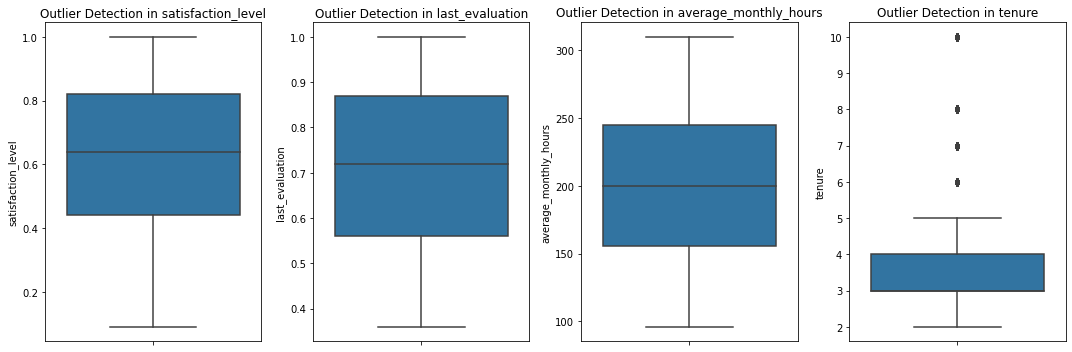

In [10]:
# Box ploxs to identify outlier in the dataset
plt.figure(figsize=(15,5))

columns = ['satisfaction_level', 'last_evaluation', 
           'average_monthly_hours', 'tenure']

for i, col in enumerate(columns, 1):  # Start index at 1 for subplot numbering
    plt.subplot(1, len(columns), i)  # Create dynamic subplots
    sns.boxplot(y=capstone_1[col])
    plt.title(f'Outlier Detection in {col}')

plt.tight_layout()
plt.show()


In [11]:
# Getting the interquatile range in the 'tenure' field
percentile25 = capstone_1['tenure'].quantile(0.25)

percentile75 = capstone_1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25


upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = capstone_1[(capstone_1['tenure'] > upper_limit) | (capstone_1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 1193


Out of the features visualized with a box plot above, tenure was the only one with signifinant outliers, but I feel it reflects the few instances of loyal or high-paid employees.


Which is essentential to clearly see which factors contributes to the employees turnover.

#### Milestone 1 Insights

##### 1. On average, employees spend 200 hours per month in a period of 3 years with the company, and partaking at least 2 projects.
##### 2. There are employees with over 300 hours of work hours; which is a sign of significant level of overwork.
##### 3. There are employees with over 10 year of experience in the company, yet the average number of tenure is 3; meaning on average, employees turnover in a span of 3 years.
##### 4. A little over 1000 employees, out of a sample of 14,999 have been with the company for either more than 5 years or least than 2 years.

### Milestone 2

#### Conduct further EDA on the data, in relation with the 'left' variable.

##### 1. Use Histogram to visualize the spread of numerical features and the frequency of the catergorical features in the data.

##### 2. Use Boxplots for Bivariate analysis (other features in relation with 'left' feature).

##### 3. Use Scatterplots to visualize the relationship between other features, while confused on the 'left' feature.

##### 4. Use a correlation matrix to see the correlation between all the features.

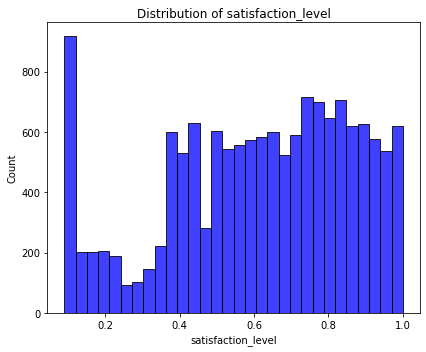

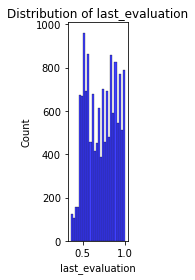

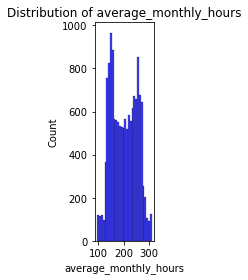

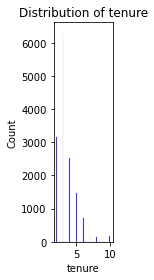

In [12]:
#Histogram for the numerical features
columns = ['satisfaction_level', 'last_evaluation', 
           'average_monthly_hours', 'tenure']

plt.figure(figsize = (22, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    sns.histplot(data = capstone_1, x = col, color = 'blue' )
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    

We can decude from the histogram of the continous features above, that;


1. The distribution of satisfaction level is bimodal with a high concentration at low satisfaction levels ( approx 0.1) and another spread across the higher range (~0.4 - 1.0).
    A large number of employees have extremely low satisfaction (possibly indicating job dissatisfaction, leading to higher turnover).


2. In the distribution of last evaluation, there is a dense cluster between 0.8 and 1.0 suggests that a significant number of employees received high performance evaluations.
    There is a dip in the middle range (~0.55 - 0.7), possibly indicating a performance gap where fewer employees are in the "average" evaluation range.
   
   
3. Looking the distribution of average monthly hours, the distribution suggests different working patterns, possibly standard working hours (approx 150-200 hours) and overtime workers (approx 250+ hours).
    The spike at the extreme end (~300+ hours) indicates some employees might be overworked, which could contribute to burnout and higher turnover rates.
    
    
4. Distribution of the tenure shows a high concentration within 1 - 6 years period, suggesting most employees don't stay with the company for a long period and a significant amount of turnovers as the year goes by.
    
    
##### Employees with low satisfaction might be at higher risk of leaving.
##### Employees with high evaluations may either be high performers or burnt out from excessive workload.
##### Workload (monthly hours) is not evenly distributed, which might correlate with job satisfaction and turnover.
#####  The company lacks a good number of experience employees and lose potential replacements, which likely leads to always training lots of new blood every year.

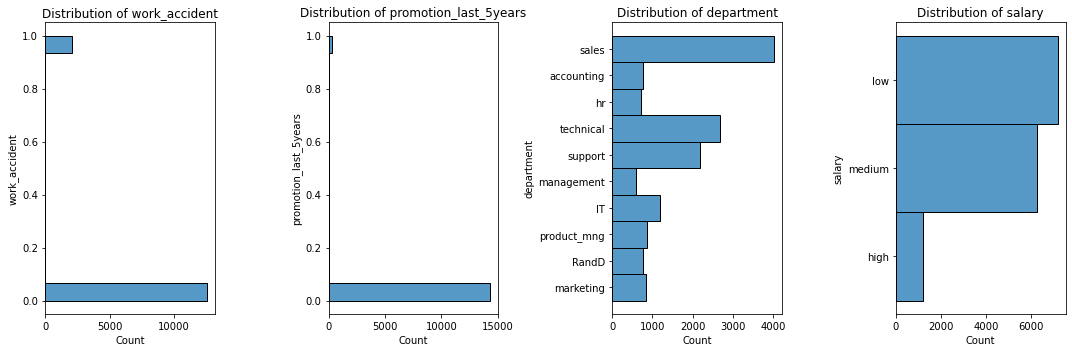

In [13]:
#Histogram for categorical features
columns = ['work_accident','promotion_last_5years',
           'department','salary']

plt.figure(figsize=(15,5))

for i, col in enumerate(columns, 1):  
    plt.subplot(1, len(columns), i)  
    sns.histplot(y=capstone_1[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

We can deduced from the histogram of the categorical features;

1. A low occurence of accident at work (clearly a good thing and not a likely factor for employees exiting)

2. A very low amount of employees get promoted in the last 5 year; which makes sense if most of them barely use 5 years in the company.

3. A very large number of employees (approximately 50%) earning 'low' amount of income and a vast number of them being in either 'Sale', 'Technical' and 'Support' department. This seems like very good dicator for employees' turning-over.

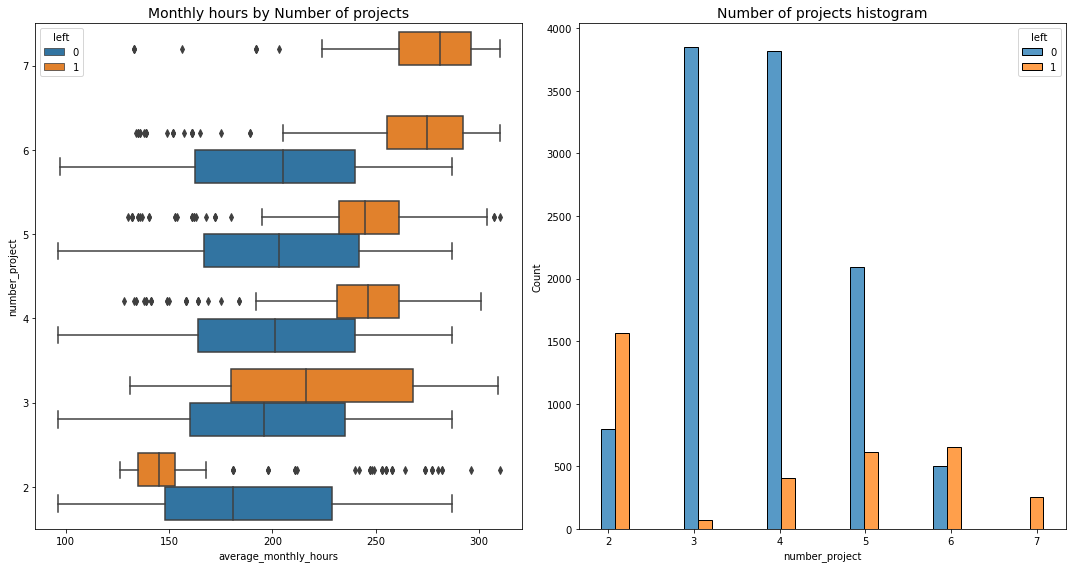

In [14]:
#Bivariate analysis

fig, ax = plt.subplots(1, 2, figsize = (15,8))
  
sns.boxplot(data = capstone_1, x = 'average_monthly_hours', y='number_project', hue = 'left', orient="h", ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title(f'Monthly hours by Number of projects', fontsize='14')

sns.histplot(data=capstone_1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.tight_layout()
plt.show()


##### With the inclination that more projects given results to more working hours, which the visuals above support in this case.

1. Firstly, the mean hour of each group (employee that left and those that haven't) increases with the number of projects.

2. There are two groups of employees who left the company: 
    (A) Those who worked considerably less than their peers with the same number of projects, and 
    (B) Those who worked much more. 
    
    Of those in group A, it's possible that they were fired. 
    
    It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit.
    
    The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

In [15]:
# Get value counts of stayed/left for employees with 7 projects
capstone_1[capstone_1['number_project']==7]['left'].value_counts()

1    256
Name: left, dtype: int64

This confirms that all employees with 7 projects did leave

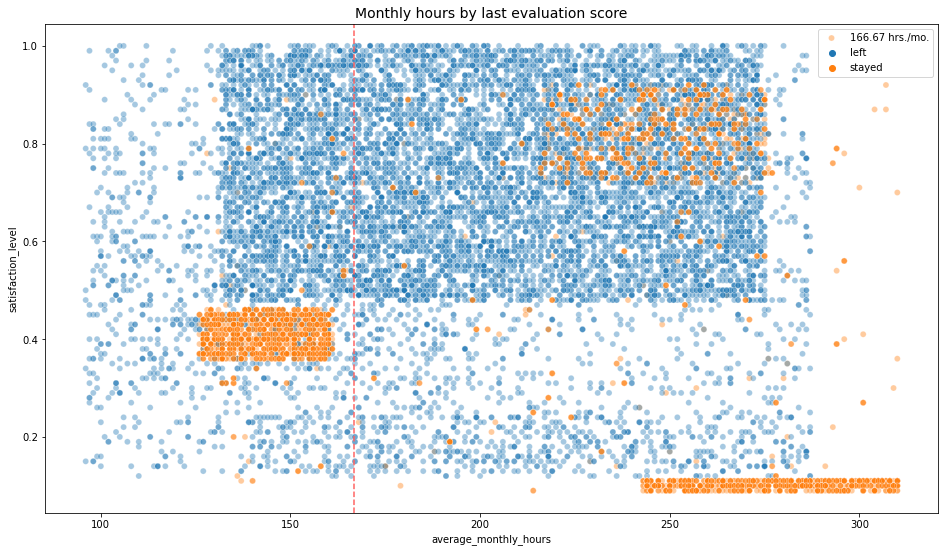

In [16]:
#Scatterplot of average monthly hours by evaluation score
plt.figure(figsize=(16, 9))
sns.scatterplot(data=capstone_1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

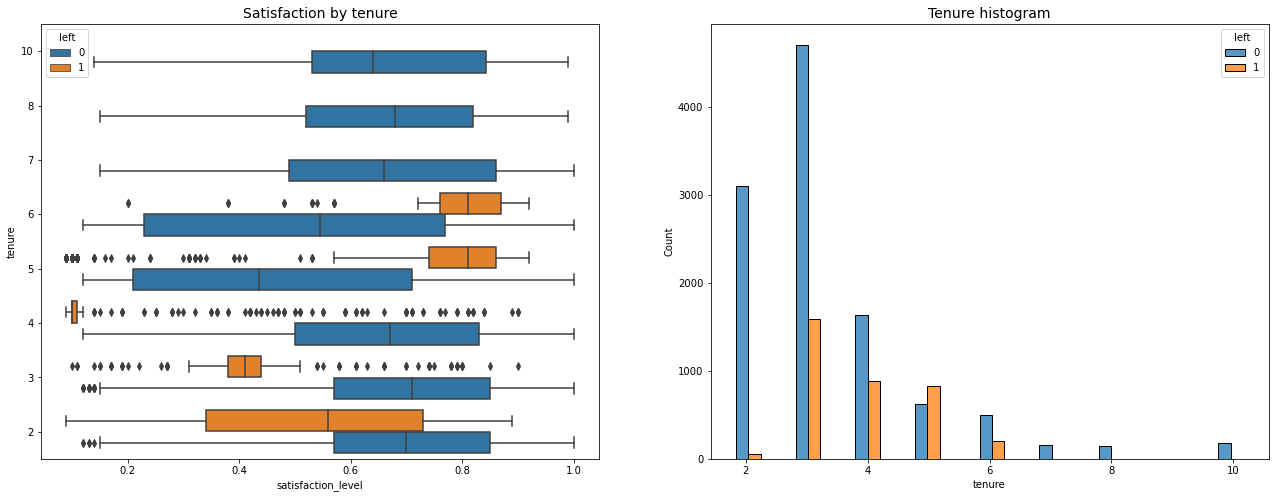

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# The distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=capstone_1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# The distribution of `tenure`, comparing employees who stayed versus those who left
sns.histplot(data=capstone_1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

We can deduce that;
1. The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

2. Four-year employees who left seem to have an unusually low satisfaction level.

3. Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

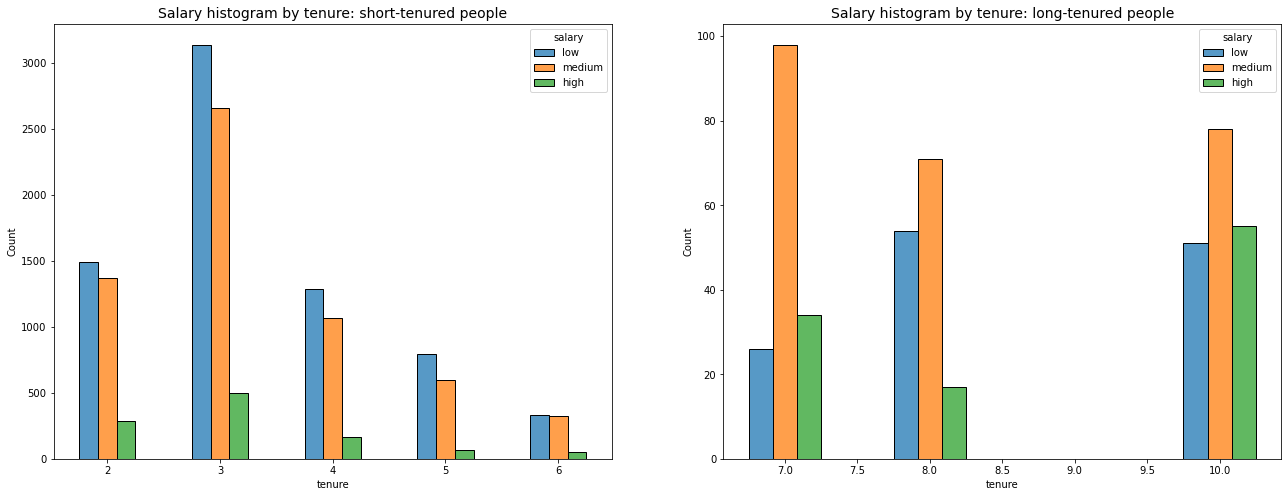

In [18]:
# Histogram for both short and long term employees, showing the distribution the different scale of salary by tenure
fig, ax = plt.subplots(1, 2, figsize = (22,8))

tenure_short = capstone_1[capstone_1['tenure'] < 7]
tenure_long = capstone_1[capstone_1['tenure'] > 6]

# Short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

plt.show()

We can deduce;

1. Long-term employees don't necessaryily mean they are high-paid employees but it does suggeset a significant increase in salary.

2. A sizable sum of Short-term employees are low-paid employees 

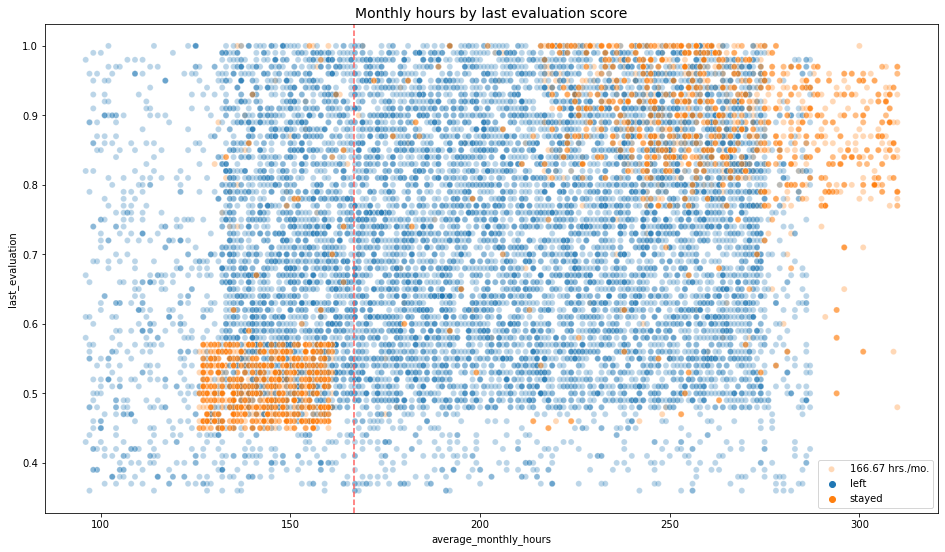

In [19]:
# Scatterplot of `average_monthly_hours` versus `last_evaluation`

plt.figure(figsize=(16, 9))
sns.scatterplot(data=capstone_1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.3)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.show()

We can deduce;

1. Most of the employees in this company work well over 167 hours per month.


2. The scatterplot shows two significant group of the employees who left:

    (A) Employees who work under the nominal monthly average salary (166.67 hrs per month) with low evaluation scores.
    
    (B) Employees who put in much more extra work hours and have very good evaluaiton scores.
    
    
3. There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.

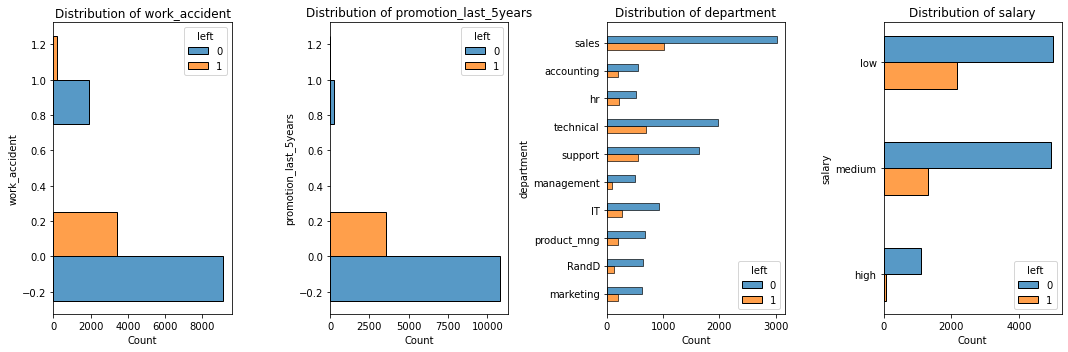

In [20]:
#Histogram for categorical features to compare department distribution of employees who left to that of employees who didn't
columns = ['work_accident','promotion_last_5years',
           'department','salary']

plt.figure(figsize=(15,5))

for i, col in enumerate(columns, 1):  
    plt.subplot(1, len(columns), i)  
    sns.histplot(y=capstone_1[col], hue = capstone_1['left'], discrete=1, hue_order=[0, 1], multiple='dodge', shrink=.5)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

The proportion of employees who left to those who stayed in each feature under their respective segments doesn't seem to differ significantly.

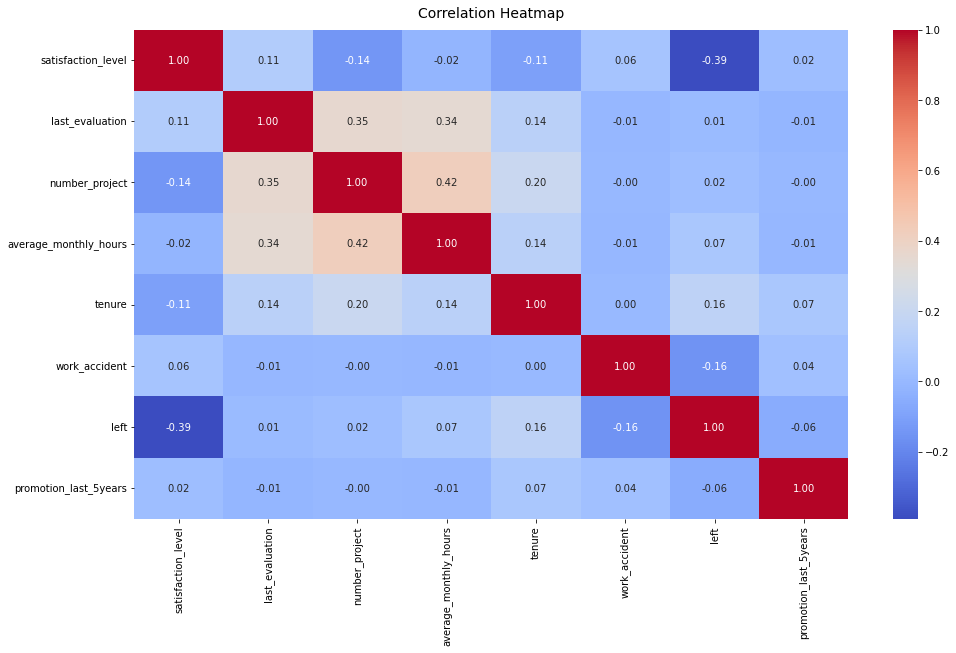

In [21]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(capstone_1.corr(), annot=True, cmap = "coolwarm", fmt = ".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

#### Milestone 2 Insight

##### The evidence that show why employee turnover revolves around long working hours, many projects, low satisfaction level and a stable work environment. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

### Milestone 3

#### The construction of models to predict employee turnover, then pick out the one with the best performance.

1. Logistic Regression
2. Random Forest Classifier
3. XGBoost 

In [22]:
#Logistic Regression model

cap_log = capstone_1.copy()
cap_log['salary'] = (cap_log['salary'].astype('category')
                    .cat.set_categories(['low','medium','high'])
                    .cat.codes)
cap_log = pd.get_dummies(cap_log, drop_first=False)

cap_log.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
783,0.36,0.46,2,132,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
784,0.44,0.57,2,131,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
785,0.85,0.99,5,248,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
786,0.78,0.93,5,225,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
787,0.39,0.46,2,156,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


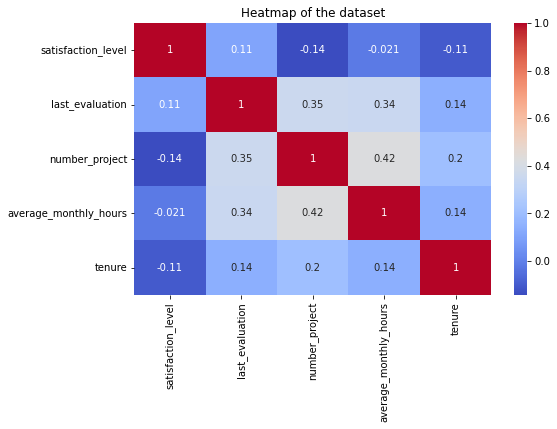

In [23]:
# A heatmap to visualize how correlated the continous variables are
plt.figure(figsize=(8, 5))
sns.heatmap(cap_log[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap of the dataset')
plt.show()

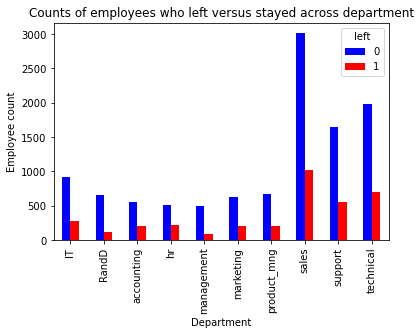

In [24]:
# A stacked bart plot to once again;
#visualize number of employees across department, comparing those who left with those who didn't
pd.crosstab(capstone_1['department'], capstone_1['left']).plot(kind ='bar',color='br')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [25]:
# Using the threehold limiters we assigned earlier to cut out all the outliers.
cap_logreg = cap_log[(cap_log['tenure'] >= lower_limit) & (cap_log['tenure'] <= upper_limit)]

cap_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
783,0.36,0.46,2,132,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
784,0.44,0.57,2,131,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
785,0.85,0.99,5,248,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
786,0.78,0.93,5,225,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
787,0.39,0.46,2,156,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
#Checking for feature imbalance
cap_logreg['left'].value_counts(normalize = True)

0    0.749851
1    0.250149
Name: left, dtype: float64

There is approximately 75 - 25% split, so the data is clearly imbalance but not still acceptable. It is safe to proceed by splitting and training the model.

In [27]:
x = cap_logreg.drop('left', axis = 1)

y = cap_logreg['left']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, stratify = y, random_state = 10)

log_clf = LogisticRegression(random_state = 10, max_iter = 500).fit(x_train, y_train)

y_pred = log_clf.predict(x_test)

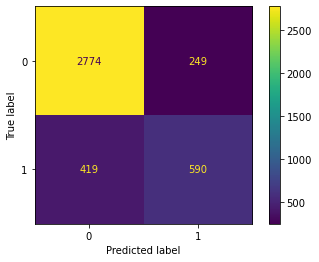

In [28]:
#Evalulate the Logistic Regression Performance using Confusion Matrix
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)# Create display of confusion matrix

log_disp.plot(values_format='')# Plot confusion matrix

plt.show()

##### The measures

True positives: The number of people who left the model accurately predicted as leaving

False negatives: The number of people who left that the model inaccurately predicted did not leave

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

##### Interpretation of the Logistic Classification model as 

The model predicts more false negative than false positive, which means that some employees may be identified at the risk of not quitting, when it might not be actually be the case.

In [29]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.87      0.92      0.89      3023
    Predicted would leave       0.70      0.58      0.64      1009

                 accuracy                           0.83      4032
                macro avg       0.79      0.75      0.77      4032
             weighted avg       0.83      0.83      0.83      4032



In [30]:

def generate_results(model_name: str, model_object=None, metric: str = None, 
                     preds=None, y_test_data=None, classification_report_dict=None):
    '''
    Arguments:
        model_name (str): Name of the model in the output table.
        model_object: A fitted GridSearchCV/RandomizedSearchCV object.
        metric (str): One of 'precision', 'recall', 'f1', 'accuracy', or 'auc'.
        preds: Model predictions on the test set.
        y_test_data: True labels for the test set.
        classification_report_dict: Dictionary output from classification_report(y_test, preds, output_dict=True).

    Returns:
        A pandas DataFrame with precision, recall, F1-score, accuracy, and AUC (if available).
    '''


    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'}

    auc = None  # Default AUC value (if available)

    if model_object is not None and metric is not None:
        
        cv_results = pd.DataFrame(model_object.cv_results_)
        best_index = cv_results[metric_dict[metric]].idxmax()
        best_estimator_results = cv_results.iloc[best_index, :]

        precision = best_estimator_results.mean_test_precision
        recall = best_estimator_results.mean_test_recall
        f1 = best_estimator_results.mean_test_f1
        accuracy = best_estimator_results.mean_test_accuracy

        if 'mean_test_roc_auc' in best_estimator_results:
            auc = best_estimator_results.mean_test_roc_auc

    elif preds is not None and y_test_data is not None:
        
        accuracy = accuracy_score(y_test_data, preds)
        precision = precision_score(y_test_data, preds, average='weighted')
        recall = recall_score(y_test_data, preds, average='weighted')
        f1 = f1_score(y_test_data, preds, average='weighted')

    elif classification_report_dict is not None:
        # Extract weighted avg values from classification report dictionary
        precision = classification_report_dict['weighted avg']['precision']
        recall = classification_report_dict['weighted avg']['recall']
        f1 = classification_report_dict['weighted avg']['f1-score']
        accuracy = classification_report_dict['accuracy']

    else:
        raise ValueError("Provide either (model_object, metric), (preds, y_test_data), or classification_report_dict.")

    
    results = {'model': [model_name],
               'precision': [precision],
               'recall': [recall],
               'F1': [f1],
               'accuracy': [accuracy]}

    if auc is not None:
        results['auc'] = [auc]

    return pd.DataFrame(results)


In [31]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.
    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data
    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return table

In [32]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

cap_rf = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

%%time
cap_rf.fit(x_train,y_train)

In [33]:
#import pickle and path
import pickle 
path = r'C:\Users\HP\Downloads\Data analytics\Capstone\Capstone'

In [34]:
#Storing the scorings in a pickle

def write_pickle(path, model_object, save_name:str):
 
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
#write_pickle(path, cap_rf, '_Classifier_Model')

In [35]:
def read_pickle(path, saved_model_name:str):

    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [36]:
cap_rf_cv = read_pickle(path, '_Classifier_Model')
cap_rf_cv_results = generate_results('RF CV', model_object = cap_rf_cv, metric = 'auc')

cap_rf_test = get_scores('RF test scores',cap_rf_cv, x_test, y_test )

cap_clf_results = pd.concat([cap_rf_cv_results,cap_rf_test])
cap_clf_results

,model,precision,recall,F1,accuracy,auc
0,RF CV,0.990661,0.946452,0.968052,0.984375,0.988796
0,RF test scores,0.985356,0.933598,0.958779,0.979911,0.964483


In [37]:
cap_rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

The performance of the random forest is quite good, but this is a chance of data leakage - It is likely that the company won't have satisfaction levels reported for all of its employees, and some employees  were laid off by the company themselves, which will then to explain some employees having low avg_monthly_hrs

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

I would define being overworked as working more than 176 hours per month on average.

In [38]:
# Firstly, we drop `satisfaction_level` entirely
cap_logreg_2 = cap_logreg.drop('satisfaction_level', axis=1)


#The create feature to signify employees that are overworked
cap_logreg_2['overworked'] = cap_logreg_2['average_monthly_hours']

cap_logreg_2['overworked'] = (cap_logreg_2['overworked'] > 176).astype(int)

cap_logreg_2 = cap_logreg_2.drop('average_monthly_hours', axis=1)


# Isolate the x and y features
Y = cap_logreg_2['left']

X = cap_logreg_2.drop('left', axis=1)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, stratify=Y, random_state=0)

cap_rf_2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [40]:
%%time
cap_rf_2.fit(X_train,Y_train)

CPU times: total: 23min
Wall time: 23min 7s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'precision', 'recall', 'f1', 'roc_auc'})

In [39]:
#write_pickle(path, cap_rf_2, '_2nd_Classificaition_model')


#pick back the pickle
read_pickle(path, '_2nd_Classificaition_model')
cv_2_result = read_pickle(path,'_2nd_Classificaition_model')

# The cv performance of the second random forest into a dataframe
cap_rf_cv_results = generate_results('RF 2nd cv', model_object = cv_2_result, metric = 'auc' )

cap_rf_test2 = get_scores('2nd RF test scores', cv_2_result, X_test, Y_test)

# Concatinating all the random forest perfomance
cap_clf_results = pd.concat([cap_clf_results, cap_rf_cv_results, cap_rf_test2])
cap_clf_results

,model,precision,recall,F1,accuracy,auc
0,RF CV,0.990661,0.946452,0.968052,0.984375,0.988796
0,RF test scores,0.985356,0.933598,0.958779,0.979911,0.964483
0,RF 2nd cv,0.943525,0.912372,0.927660,0.964385,0.981191
0,2nd RF test scores,0.945946,0.916667,0.931076,0.966071,0.949603


##### The first random forest model gave good results on their cross validation and test scores but they are too good, likely do over fitting or data leakage or both.


##### So, the second random forest model still performed good, even if it scores are less than the first random forest; we managed to remove data leakage

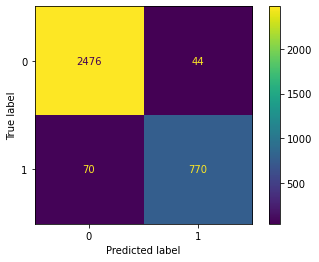

In [40]:
#Construct a Matrix for the second random forest
Y_pred = cv_2_result.best_estimator_.predict(X_test)

cm2 = confusion_matrix(Y_test, Y_pred, labels = cv_2_result.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = cv_2_result.classes_)

disp.plot(values_format = '')

#### The second Random Forest predicts more false negative than false positve, which means some employees may be identified as at the risk of not quitting or turninng-over, when that's not the case.

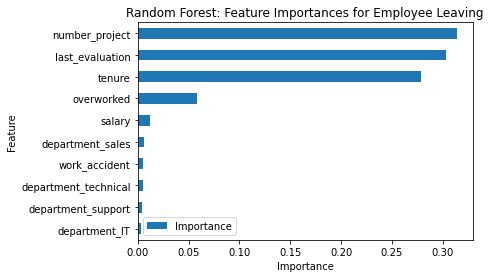

In [41]:
# Get feature importances of the best random forest

feat_impt = cv_2_result.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(cv_2_result.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

#### The plot above shows that in this random forest model; number_project, last_evaluation, tenure, and overworked have the highest importance, in that order.

#### Summary of model results
##### Logistic Regression

The logistic regression model achieved precision of 83%, recall of 83%, f1-score of 83% (all weighted averages), and accuracy of 83%, on the test set.

##### Tree-based Machine Learning

After conducting feature engineering, the random forest model achieved AUC of 95%, precision of 94.6%, recall of 91.7%, f1-score of 93.1%, and accuracy of 96.6%, on the test set. The first random forest modestly outperformed the second random forest.

Conclusion, Recommendations, Next Steps
The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.